In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

In [2]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/siena2018-pres.csv'
df = pd.read_csv(url,index_col=0)
df.head()

,Seq.,President,Party,Bg,Im,Int,IQ,L,WR,AC,...,PL,RC,CAp,HE,EAp,DA,FPA,AM,EV,O
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,18,1,1,1,1,2,2,1,2,1
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,28,17,4,13,15,19,13,16,10,14
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,5,5,7,20,4,6,9,7,5,5
4,4,James Madison,Democratic-Republican,4,6,7,3,16,15,6,...,9,10,6,14,7,11,19,11,8,7
5,5,James Monroe,Democratic-Republican,9,14,11,18,6,16,7,...,12,8,11,9,9,10,5,6,9,8


In [17]:
def tweak_pres_df(df):
    def int64_to_uit8(x):
        cols = x.select_dtypes('int64')
        return x.astype({col: 'uint8' for col in cols})
    
    return (df
    .rename(columns={'Seq.': 'Seq'})
    .rename(columns={k:v.replace(' ','_') for k,v in
    {'Bg': 'Background', 
    'PL': 'Party leadership ', 'CAb ': ' Communication ability ',
     'RC': 'Relations with Congress ', 'CAp ': 'Court appointments ',
     'HE': 'Handling of economy ', 'L ': 'Luck ',
     'AC': 'Ability to compromise ', 'WR ': 'Willing to take risks ',
     'EAp': 'Executive appointments ', 'OA ': 'Overall ability ',
     'Im': 'Imagination ', 'DA ': 'Domestic accomplishments ',
     'Int': 'Integrity ', 'EAb ': 'Executive ability ',
     'FPA': 'Foreign policy accomplishments ',
     'LA': 'Leadership ability ',
     'IQ': 'Intelligence ', 'AM ': 'Avoid crucial mistakes ',
     'EV': " Experts ' view ", 'O ': 'Overall '}.items()})
     .astype({'Party':'category'})
     .pipe(int64_to_uit8)
     .assign(Average_rank = lambda x:(x.select_dtypes('uint8')).sum(axis=1).rank(method='dense').astype('uint8')
     ,Quartile= lambda x:pd.qcut(x.Average_rank,4,labels=['1st','2nd','3rd','4th'])
     )

    )   

In [18]:
pres = tweak_pres_df(df)
pres.head()

,Seq,President,Party,Background,Imagination_,Integrity_,Intelligence_,L,WR,Ability_to_compromise_,...,CAp,Handling_of_economy_,Executive_appointments_,DA,Foreign_policy_accomplishments_,AM,_Experts_'_view_,O,Average_rank,Quartile
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,1,1,1,2,2,1,2,1,1,1st
2,2,John Adams,Federalist,3,13,4,4,24,14,31,...,4,13,15,19,13,16,10,14,13,2nd
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,7,20,4,6,9,7,5,5,5,1st
4,4,James Madison,Democratic-Republican,4,6,7,3,16,15,6,...,6,14,7,11,19,11,8,7,7,1st
5,5,James Monroe,Democratic-Republican,9,14,11,18,6,16,7,...,11,9,9,10,5,6,9,8,8,1st


In [19]:
pres.dtypes

Seq                                  object
President                            object
Party                              category
Background                            uint8
Imagination_                          uint8
Integrity_                            uint8
Intelligence_                         uint8
L                                     uint8
WR                                    uint8
Ability_to_compromise_                uint8
EAb                                   uint8
Leadership_ability_                   uint8
CAb                                   uint8
OA                                    uint8
Party_leadership_                     uint8
Relations_with_Congress_              uint8
CAp                                   uint8
Handling_of_economy_                  uint8
Executive_appointments_               uint8
DA                                    uint8
Foreign_policy_accomplishments_       uint8
AM                                    uint8
_Experts_'_view_                

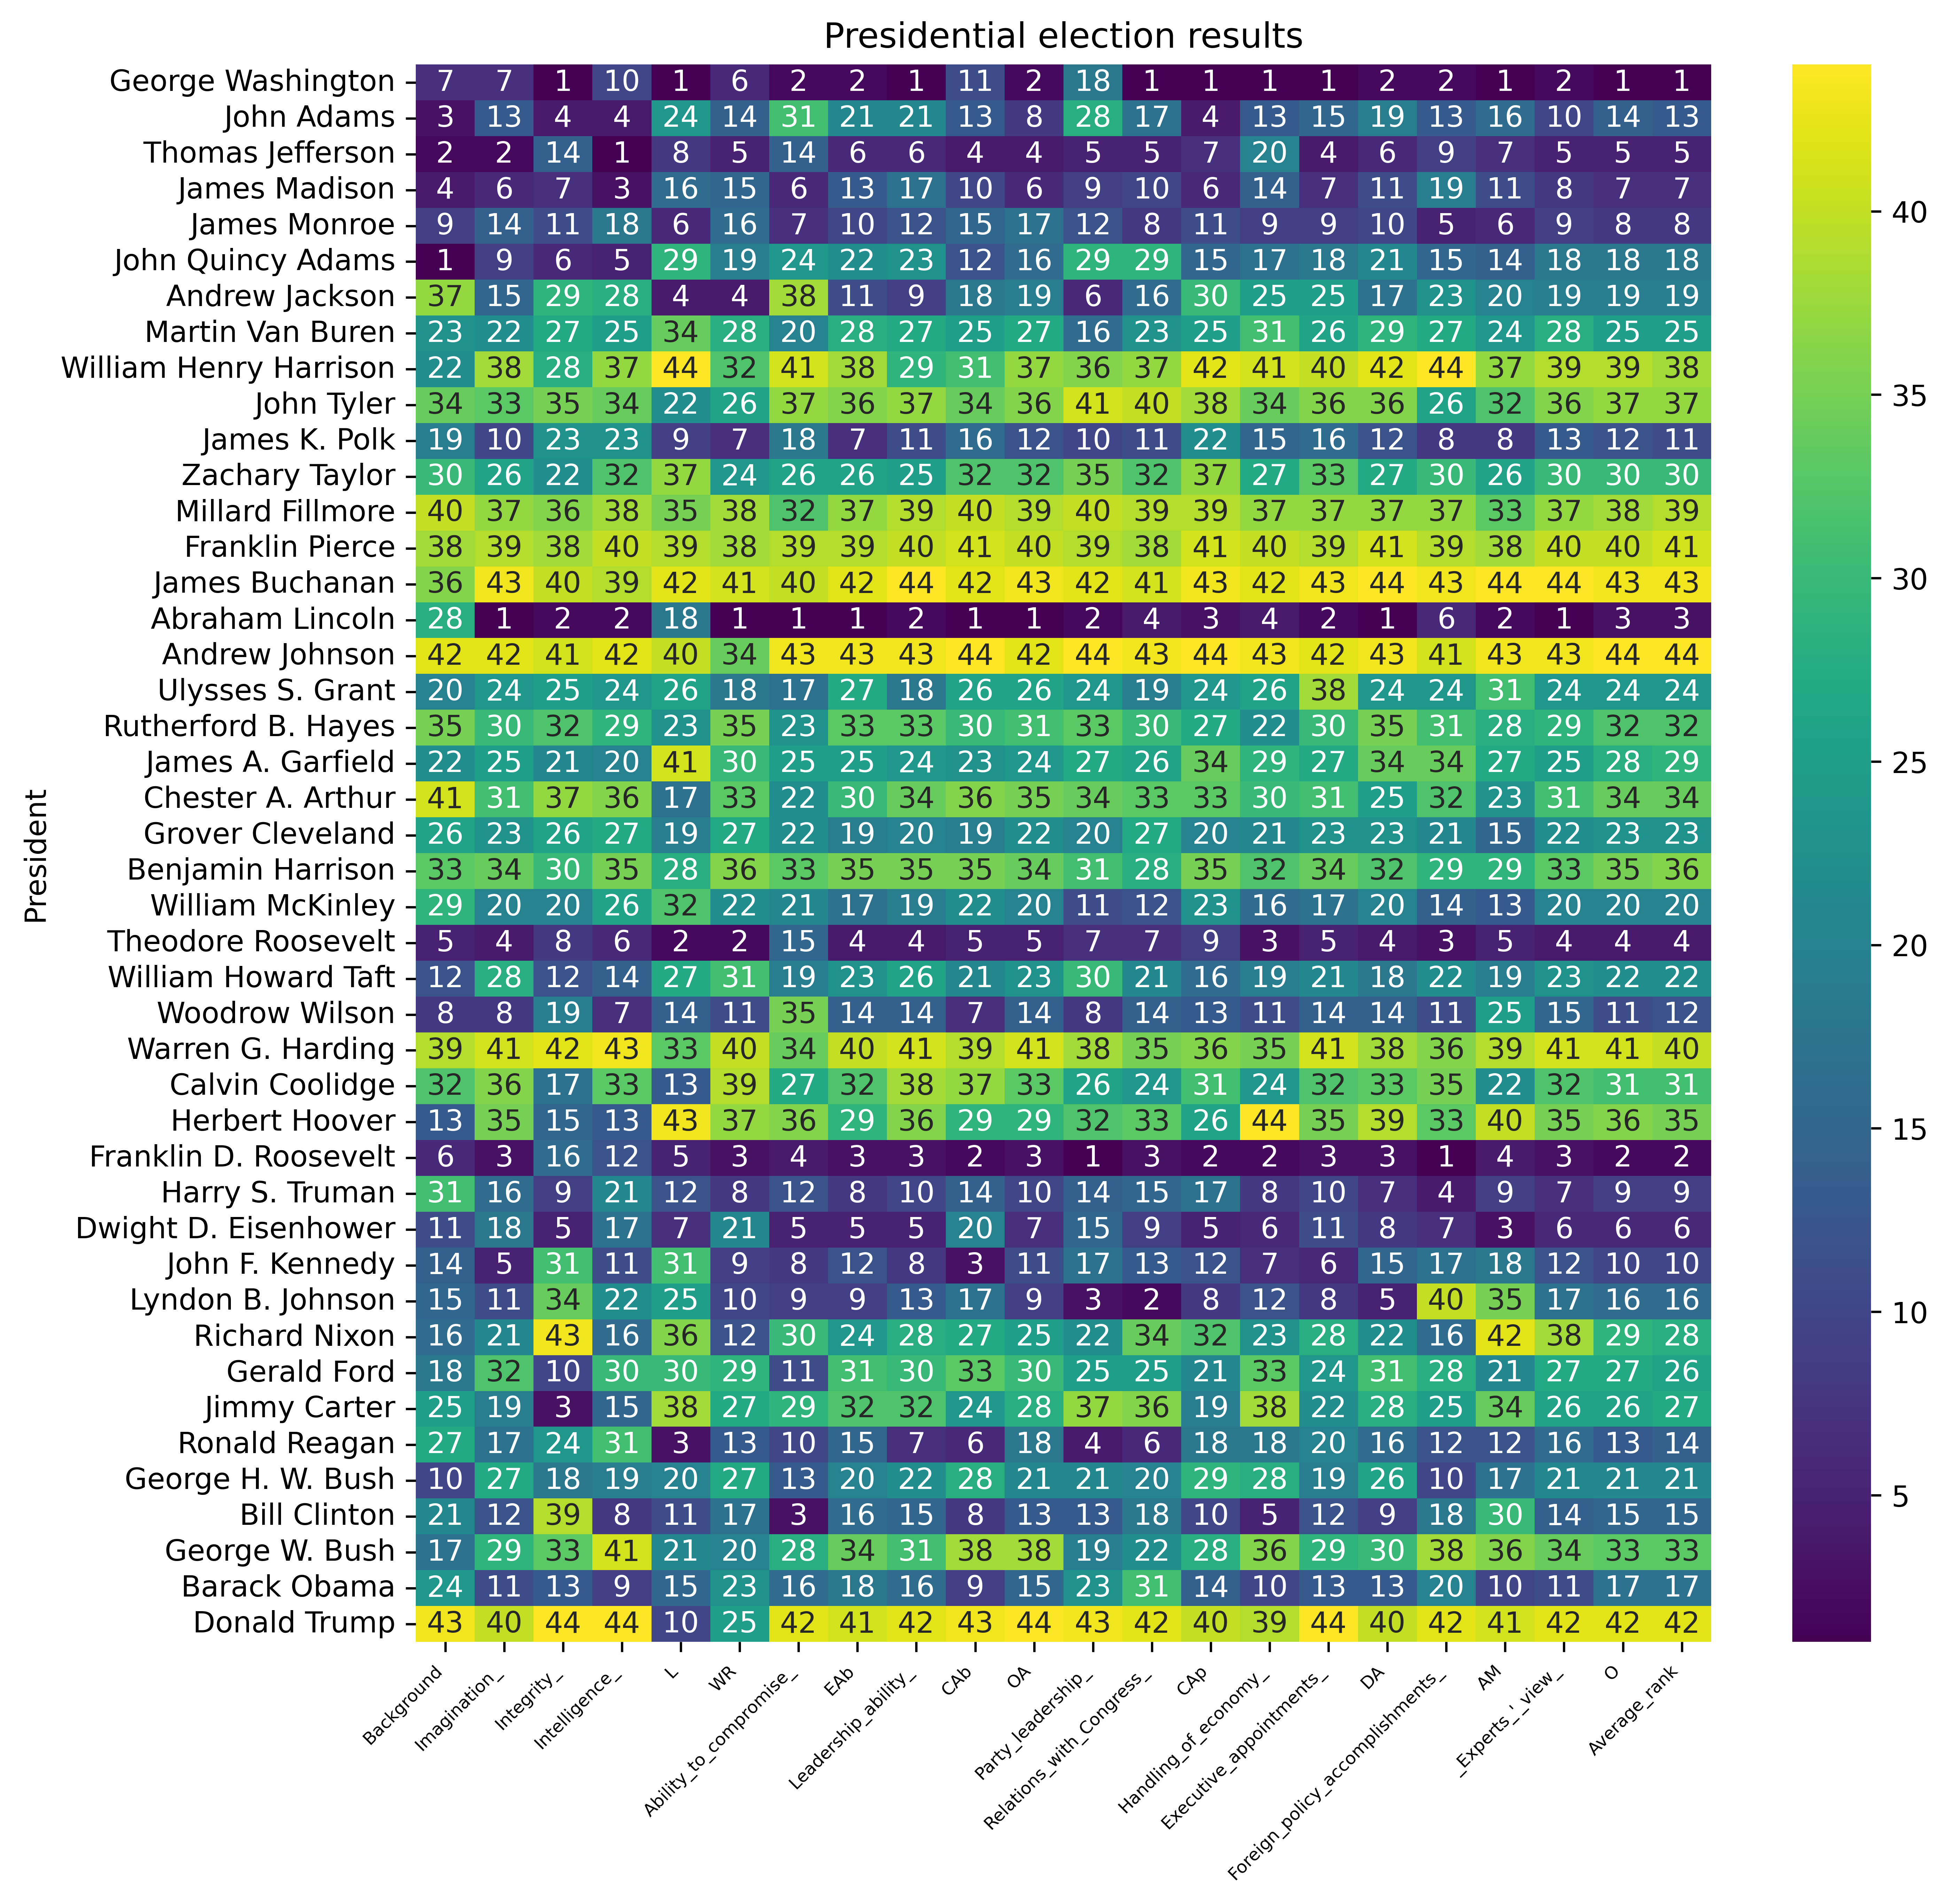

In [23]:
fig, ax = plt.subplots(figsize=(10,10),dpi=600)
g = sns.heatmap((tweak_pres_df(df)
.set_index('President')
.iloc[:,2:-1]),annot=True,cmap='viridis',ax=ax)
g.set_xticklabels(g.get_xticklabels(),rotation=45,fontsize=6 ,ha='right')
plt.title('Presidential election results')
plt.show()
fig.savefig('img/president_heatmap.png')

In [4]:
df.sample(3)

,Seq.,President,Party,Bg,Im,Int,IQ,L,WR,AC,...,PL,RC,CAp,HE,EAp,DA,FPA,AM,EV,O
30,31,Herbert Hoover,Republican,13,35,15,13,43,37,36,...,32,33,26,44,35,39,33,40,35,36
6,6,John Quincy Adams,Democratic-Republican,1,9,6,5,29,19,24,...,29,29,15,17,18,21,15,14,18,18
32,33,Harry S. Truman,Democratic,31,16,9,21,12,8,12,...,14,15,17,8,10,7,4,9,7,9


In [8]:
df_sample = df.loc[:,['Bg','WR','PL']]
df_sample.head()

,Bg,WR,PL
1,7,6,18
2,3,14,28
3,2,5,5
4,4,15,9
5,9,16,12


In [9]:
df_sample+df_sample

,Bg,WR,PL
1,14,12,36
2,6,28,56
3,4,10,10
4,8,30,18
5,18,32,24
6,2,38,58
7,74,8,12
8,46,56,32
9,44,64,72
10,68,52,82


In [10]:
df_sample.mul(2)

,Bg,WR,PL
1,14,12,36
2,6,28,56
3,4,10,10
4,8,30,18
5,18,32,24
6,2,38,58
7,74,8,12
8,46,56,32
9,44,64,72
10,68,52,82


In [16]:
assert(np.all(df_sample.mul(2)==df_sample*2))

In [27]:
# Iterate over rows and columns
#over columns
for col_name, col in pres.iloc[0,:].iteritems():
    print(col_name, col)
    break

Seq 1


In [31]:
# Iterate over rows and rows
#over columns
for idx, row in pres.iloc[:1,:].iterrows():
    print(idx, row)
    break

1 Seq                                                1
President                          George Washington
Party                                    Independent
Background                                         7
Imagination_                                       7
Integrity_                                         1
Intelligence_                                     10
L                                                  1
WR                                                 6
Ability_to_compromise_                             2
EAb                                                2
Leadership_ability_                                1
CAb                                               11
OA                                                 2
Party_leadership_                                 18
Relations_with_Congress_                           1
CAp                                                1
Handling_of_economy_                               1
Executive_appointments_                     

In [34]:
#using aggregations 
pres.agg(['count','mean','std',lambda x:x.loc[1]])

,Seq,President,Party,Background,Imagination_,Integrity_,Intelligence_,L,WR,Ability_to_compromise_,...,CAp,Handling_of_economy_,Executive_appointments_,DA,Foreign_policy_accomplishments_,AM,_Experts_'_view_,O,Average_rank,Quartile
count,44,44,44,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44
mean,NaN,NaN,NaN,22.000000,21.750000,22.500000,22.500000,22.500000,21.659091,22.000000,...,22.500000,22.500000,22.500000,22.500000,22.500000,22.500000,22.500000,22.500000,22.500000,NaN
std,NaN,NaN,NaN,12.409674,12.519984,12.845233,12.845233,12.845233,11.892822,12.409674,...,12.845233,12.845233,12.845233,12.845233,12.845233,12.845233,12.845233,12.845233,12.845233,NaN
<lambda>,1,George Washington,Independent,7.000000,7.000000,1.000000,10.000000,1.000000,6.000000,2.000000,...,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1st


In [37]:
#use a dictionary to store the aggregations
pres.agg({'L':['count','mean'],'Average_rank':['count','max']})


,L,Average_rank
count,44.0,44.0
mean,22.5,NaN
max,NaN,44.0


In [10]:
df.select_dtypes('number').sum(axis=0)

Bg     968
Im     957
Int    990
IQ     990
L      990
WR     953
AC     968
EAb    978
LA     990
CAb    990
OA     990
PL     990
RC     979
CAp    990
HE     990
EAp    990
DA     990
FPA    990
AM     990
EV     990
O      990
dtype: int64

In [11]:
import io

In [28]:

billing_data = \
'''cancel_date,period_start,start_date,end_date,rev,sum_payments
12/1/2019,1/1/2020,12/15/2019,5/15/2020,999,50
,1/1/2020,12/15/2019,5/15/2020,999,50
,1/1/2020,12/15/2019,5/15/2020,999,1950
1/20/2020,1/1/2020,12/15/2019,5/15/2020,499,0
,1/1/2020,12/24/2019,5/24/2020,699,100
,1/1/2020,11/29/2019,4/29/2020,799,250
,1/1/2020,1/15/2020,4/29/2020,799,250'''

In [31]:
bill_df = pd.read_csv(io.StringIO(billing_data),parse_dates=['period_start','start_date','end_date','cancel_date'])
bill_df.head()

,cancel_date,period_start,start_date,end_date,rev,sum_payments
0,2019-12-01,2020-01-01,2019-12-15,2020-05-15,999,50
1,NaT,2020-01-01,2019-12-15,2020-05-15,999,50
2,NaT,2020-01-01,2019-12-15,2020-05-15,999,1950
3,2020-01-20,2020-01-01,2019-12-15,2020-05-15,499,0
4,NaT,2020-01-01,2019-12-24,2020-05-24,699,100


In [34]:
def calc_unbilled_rec(vals):
    cancel_date , period_start, start_date, end_date ,rev ,sum_payments = vals
    if cancel_date < period_start:
        return 
    elif start_date < period_start and end_date > period_start:
        if rev > sum_payments:
            return rev - sum_payments
        else:
            return 0

In [35]:
bill_df.apply(calc_unbilled_rec,axis=1)

0      NaN
1    949.0
2      0.0
3    499.0
4    599.0
5    549.0
6      NaN
dtype: float64

In [42]:
# use select instead of apply
pd.Series(np.select([bill_df.cancel_date < bill_df.period_start, #1

              (bill_df.start_date < bill_df.period_start) & #2
                (bill_df.end_date > bill_df.period_start) &
                (bill_df.rev > bill_df.sum_payments ),

                (bill_df.start_date < bill_df.period_start) & #3
                (bill_df.end_date > bill_df.period_start) &
                (bill_df.rev <= bill_df.sum_payments )],

                [np.nan,bill_df.rev - bill_df.sum_payments,0],np.nan))


0      NaN
1    949.0
2      0.0
3    499.0
4    599.0
5    549.0
6      NaN
dtype: float64

In [44]:
#Simplyfy select concept
np.select([bill_df.cancel_date < bill_df.period_start ,
bill_df.cancel_date > bill_df.period_start], ['Before','After'])

array(['Before', '0', '0', 'After', '0', '0', '0'], dtype='<U6')